#Логистическая регрессия


### Модель логистической регрессии

Допустим мы решаем задачу бинарной классификации, в которой целевая переменная принимает два значения: -1 и +1 (это может быть что угодно, например: -1 - человеку не выдали кредит, +1 - человеку выдали кредит; или например: -1 - животное, которое мы рассматриваем - кошка, +1 - животное - собака, главное, что у нас всего 2 класса). Решать такую задачу будем так: давайте предсказывать, с какой вероятностью объект принадлежит к положительному классу. 

Допустим у нас есть линейная модель вида:

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n = w_0 + \sum_{i=1}^n w_ix_i$$

Где $x = x_1, ..., x_n$ - признаки, с которыми работает модель (считаем, что их $n$ штук).

Как же по ней предсказать вероятность? Всё очень просто! Вспоминаем, что вероятность - это число от 0 до 1, значит нам нужно как-то перевести ответы нашей линейной модели в отрезок [0, 1]. Для этого существует функция, которая называется сигмоида или логистическая функция. 

Выглядит она так:

$$p=\frac{1}{1+e^{−y}}$$

А ее график выглядит так:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width="500" height="300">


А зная вероятности мы в итоге сможем сказать, объект принадлежит к классу -1 или +1. Например можем считать, что если вероятность принадлежности к положительному классу больше 0.5, то считаем, что объект положительного класса (+1), если меньше, то отрицательного (-1). 

Например у нас вышло, что вероятность того, что конкретному человеку стоит выдать кредит = 0.8. Ну, кажется, это значит, что мы действительно можем выдать ему кредит. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ирисы Фишера. Свойства логистической регрессии

Рассмотрим свойства логистической регрессии на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка. 

<img src="https://ranalytics.github.io/data-mining/figures/iris.PNG">

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Мы не умеем предсказывать 3 класса, так что давайте перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам.

Для этого нам придется перекодировать зависимую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку -1. 

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
y[y != 1] = -1

### Обучение модели

Теперь давайте подготовим наши данные к обучению модели. Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)

In [7]:
# импортируем функцию, которая делит нашу выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split 
np.random.seed(123)

In [9]:
# оставляем только 2 признака
X = X[['sepal length (cm)', 'sepal width (cm)']]
# делим выборку на обучающую и тестовую в соотношении 7/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Самое время обучить логистическую регрессию! 


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

[[ 0.01008124 -2.3212169 ]]


Мы обучили модель, но теперь непонятно, что с ней делать, насколько хорошей она вышла...

Для начала мы можем посмотреть на полученные коэффициенты при каждом из признаков, которые у нас вышли (аналогично как с линейной регрессией)

In [14]:
print(lr.coef_)

[[ 0.01008124 -2.3212169 ]]


### Метрики качества классификации

А теперь попробуем оценить качество нашей модели. Для этого существует множество способов, но самый простой из них - посчитать долю верных ответов (сколько предсказанных классов совпадает с истинными классами объектов). Такая материка называется **$accuracy$**.

$$Accuracy(a, x) = \frac{1}{l}\sum_{i=1}^l[a(x_i) = y_i]$$

Где $a$ - модель, $x = x_1, x_2, ..., x_l$ - объекты выборки, $y_i$ - класс объекта $x_i$ из выборки (1 или -1)

Чем ближе $accuracy$ к 1 тем лучше. $Accuracy = 1$ значит, что мы верно определили все объекты (но к сожалению на практике так почти не бывает...)

Однако у такой метрики есть свои проблемы - если у нас нарушен баланс классов (объектов одного класса сильно больше объектов второго класса), то  $accuracy$ не поможет нам верно оценить, насколько наша модель хорошо.

**Пример:**

Пускай у нас есть 950 объектов положительного класса (+1) и 50 объектов отрицательного класса. Тогда если наша модель всегда будет возвращать в качестве ответа положительный класс, то её $accuracy$ окажется 0.95. Хотя если задуматься, модель у нас такая себе...

Посмотрим, можем ли мы в случае с нашим датасетом с ирисами использовать accuracy.

Давайте для начала посмотрим на баланс в наших данных - то есть сколько в них объектов класса 1, а сколько -1

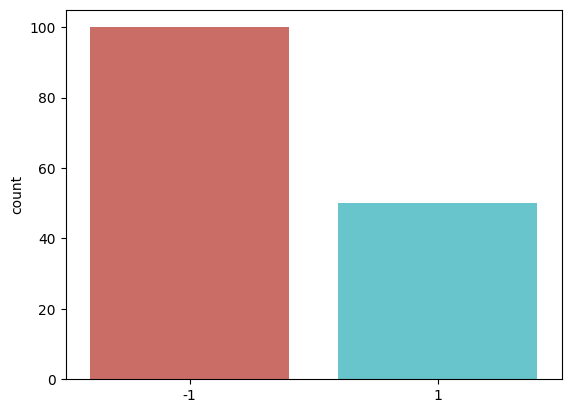

In [13]:
import seaborn as sns

sns.countplot(x='target',data=data, palette='hls')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

print('Accuracy на тесте:', accuracy_score(y_test, lr.predict(X_test)))

Accuracy на тесте: 0.6888888888888889


Дизбаланс классов, к сожалению, есть. Так что пришло время узнать о других метриках качества классфикации!

Но перед этим введем немного новых определений.

$Confusion \ Matrix$ (матрица ошибок):

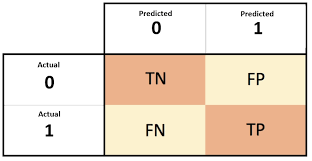

А теперь метрики! Наиболее популярными из них являются $precision \ (точность)$ и $recall \ (полнота)$. Формулы выглядят так:

$$precision = \frac{TP}{TP+FP}$$
$$recall = \frac{TP}{TP+FN}$$

Если говорить словами, то по сути $precision$ оценивает точность модели. Это доля объектов положительного класса среди всех объектов, помеченных моделью как положительный класс. А $recall$ оценивает полноту то есть это доля объектов положительного класса, которые нашла модель. 

Есть еще одна метрика, которая часто встречается - $F1$. Вычисляется она по следующей формуле:

$$F1 = \frac{2 \times precision \times recall}{precision + recall}$$

Посчитаем все метрики для нашей модели с ирисами

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [18]:
print('Precision на тесте:', precision_score(y_test, lr.predict(X_test)))
print('Recall на тесте:', recall_score(y_test, lr.predict(X_test)))
print('F1 на тесте:', f1_score(y_test, lr.predict(X_test)))

Precision на тесте: 0.6666666666666666
Recall на тесте: 0.25
F1 на тесте: 0.36363636363636365


**Упражнение:** подумайте, что такие результаты говорят о нашей модели. 

### ROC-кривая

Ранее мы узнали, что помимо $accuracy$ в задачах классификации так же используются $precision$, $recall$ и $F1$-мера. Теперь пришло время познакомиться с ещё одной метрикой – $ROC AUC$.

Вернемся к матрице ошибок и определим следующие величины:

$$
TPR \text{ (true positive rate)} = \dfrac{TP}{TP + FN} –
$$
доля правильно предсказанных объектов положительного класса (тоже самое что $recall$).

$$
FPR \text{ (false positive rate)} = \dfrac{FP}{FP + TN} –
$$
доля неправильно предсказанных объектов отрицательного класса.

Рассмотрим задачу классификации: мы предказываем вероятности принадлежности наблюдения к положительному классу. Тогда $TPR$ и $FPR$ будут зависеть от порога для вероятности, выше которого наблюдение будет отнесено к положительному классу (например если мы говорим, что начиная от вероятности 0.7 мы выдаем кредит, то порог тут - это 0.7). $ROC$-кривая строится в координатах $(FPR, TPR)$ и показывает комбинации $TPR$ и $FPR$ при всевозможных значениях порога. Для хорошего классификатора эта кривая является выгнутой, а для идеального классификатора она будет проходить через точку $(0, 1)$. Если же кривая совпадает с диагональю - то классификатор вышел очень плохим, его резульат совпадает со случайным предсказанием.

 $ROC-AUC$ - это площадь под $ROC$-кривой, чем ближе значение к 1 тем лучше. По сути это доля пар наблюдений $(y = 1, y = -1)$, которые алгоритм верно упорядочил.




Давайте построим $ROC$ кривую и посчитаем $ROC-AUC$ для нашей задачи.

In [32]:
from sklearn.metrics import roc_curve
# считаем fpr и tpr, чтобы дальше построить по ним график
# !!важный момент!! в roc_curve мы передаем предсказанные вероятности, а не классы
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

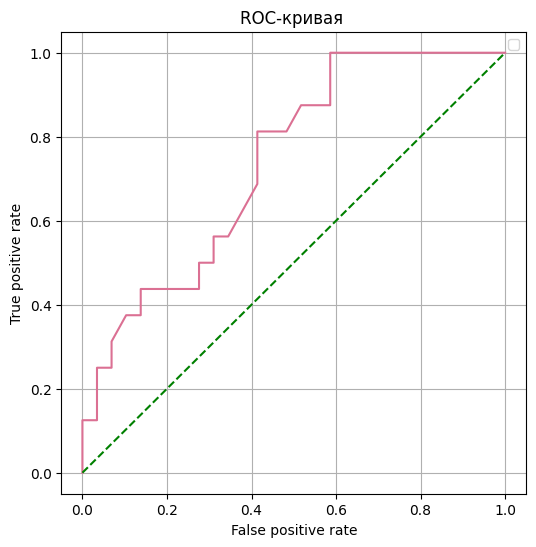

In [33]:
plt.figure(figsize=(6, 6))

plt.title('ROC-кривая ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr, tpr, color='palevioletred')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.legend()

plt.grid()
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

In [34]:
print('ROC-AUC на тесте:', roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

ROC-AUC на тесте: 0.7370689655172414


Вышло не так плохо, как могло бы быть. Значение ROC-AUC = 0.5, это то, что дает случайное предсказание, а значение = 1 у идеальной модели.